#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

#Data Preprocessing

In [ ]:
df = pd.read_csv("/content/Loan_prediction.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#let's check how many rows and columns haben wir
df.shape

(614, 13)

In [ ]:
# let's check our statistical measures of our data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# let's check whether there are some missing values or not
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# now let's drop the missiling values
df = df.dropna()

In [ ]:
# let's check again whether we still have a missing values or not
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# now let's make One-Hot-Encoding
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace = True)

<ipython-input-12-4792c0243d01>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace = True)
<ipython-input-12-4792c0243d01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace = True)


In [ ]:
# Now let's check how our Loan_Status gewechselt hat
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Let's check our 'Dependents' column (you will see why)
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [ ]:
# As we can see, there's written 3+, that's is actually a bad data, because of that we replace it with 4
df.replace({"Dependents":{'3+':4}}, inplace = True)

<Axes: >

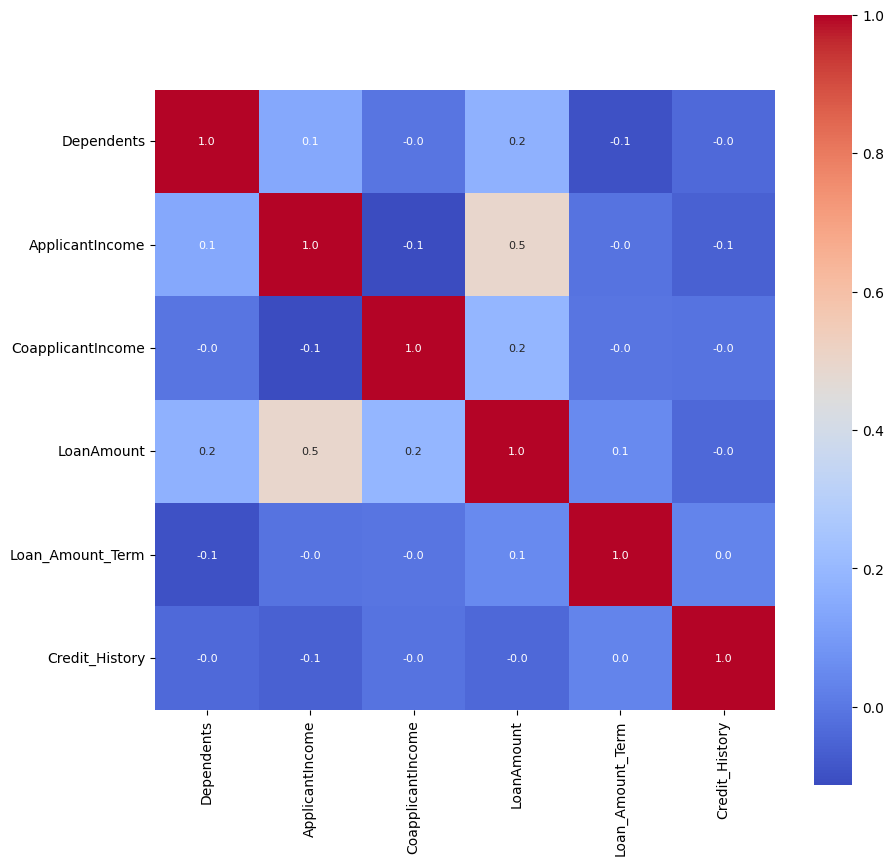

In [ ]:
# Let's make correlation between features
corr = df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

<Axes: xlabel='Married', ylabel='count'>

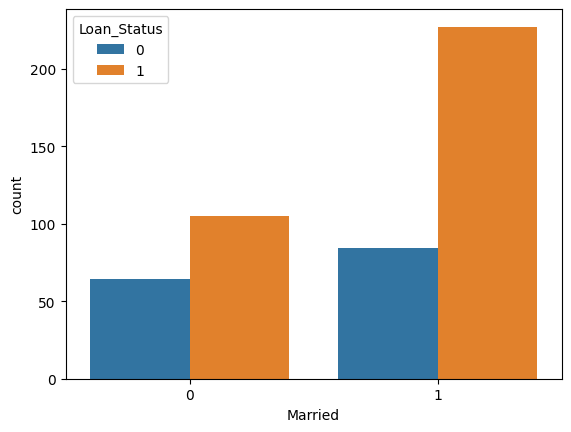

In [ ]:
# We can also plot dependences of two features
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)

In [ ]:
# Now let's finally convert our all categorical values into the integers 1 or 0
df.replace({'Married':{'No':0, 'Yes':1}}, inplace = True)
df.replace({'Gender':{'Male':1, 'Female':0}}, inplace = True)
df.replace({'Self_Employed':{'No':0, 'Yes':1}}, inplace = True)
df.replace({'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True)
df.replace({'Education':{'Graduate':1, 'Not Graduate':0}}, inplace = True)

<ipython-input-18-2316ba27b677>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0, 'Yes':1}}, inplace = True)
<ipython-input-18-2316ba27b677>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':1, 'Female':0}}, inplace = True)
<ipython-input-18-2316ba27b677>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Now let's split our data into the train and test sets

In [ ]:
df.drop(['Loan_ID'], axis = 1, inplace = True)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

#Now let's train the model by using SVM

In [ ]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

#Let's make evaluation

In [ ]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[14 16]
 [ 2 64]]


0.8125

#Let's make some prediction

In [ ]:
input_data = (1,1,0,1,1,445234344,145,555,3244,1,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[1]
The loan is approved
